# Introduction

For the Final Project : Group Part we chose the Hate Crime data set, which provides the data for hate crime that happened across USA from 1991 to 2020. The data set is modified periodically and was last modified on October 25, 2021. Each member of the group explored the data set in their own ways and came up with the ideas for different types of visualizations that gives the best insights into the data. We tried to visualize all the possible relationship in the data set to make the data easily understandable to the reader. Every member decided to move with different technologies to make the visualizations (Python, Vegalite, D3 etc).Following are the visualization that we came up with for this project. 

In [1]:
'''pip install plotly
pip install numpy
pip install pandas
pip install matplotlib
pip install ipywidgets'''

'pip install plotly\npip install numpy\npip install pandas\npip install matplotlib\npip install ipywidgets'

In [2]:
%matplotlib inline
import pandas as pd
from io import BytesIO
from zipfile import ZipFile
from urllib.request import urlopen
import ipywidgets 
import traitlets
import bqplot
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import plotly
from ipywidgets import interact, interact_manual, Layout, interact, IntSlider, widgets
from matplotlib import gridspec
import plotly.express as px
import plotly.graph_objects as go

Let's read the zip file directly from the website and extract the csv to make this notebook semi-real time:

In [3]:
resp = urlopen('https://s3-us-gov-west-1.amazonaws.com/cg-d4b776d0-d898-4153-90c8-8336f86bdfec/hate_crime.zip')
zipfile = ZipFile(BytesIO(resp.read()))
zipfile.namelist()[0]
df = pd.read_csv(zipfile.open('hate_crime.csv'))

/opt/conda/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3145: DtypeWarning: Columns (19) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


Let's look at what kind of data the dataset contains:

In [4]:
df.head()

,INCIDENT_ID,DATA_YEAR,ORI,PUB_AGENCY_NAME,PUB_AGENCY_UNIT,AGENCY_TYPE_NAME,STATE_ABBR,STATE_NAME,DIVISION_NAME,REGION_NAME,...,OFFENDER_RACE,OFFENDER_ETHNICITY,VICTIM_COUNT,OFFENSE_NAME,TOTAL_INDIVIDUAL_VICTIMS,LOCATION_NAME,BIAS_DESC,VICTIM_TYPES,MULTIPLE_OFFENSE,MULTIPLE_BIAS
0,3015,1991,AR0040200,Rogers,NaN,City,AR,Arkansas,West South Central,South,...,White,NaN,1,Intimidation,1.0,Highway/Road/Alley/Street/Sidewalk,Anti-Black or African American,Individual,S,S
1,3016,1991,AR0290100,Hope,NaN,City,AR,Arkansas,West South Central,South,...,Black or African American,NaN,1,Simple Assault,1.0,Highway/Road/Alley/Street/Sidewalk,Anti-White,Individual,S,S
2,43,1991,AR0350100,Pine Bluff,NaN,City,AR,Arkansas,West South Central,South,...,Black or African American,NaN,1,Aggravated Assault,1.0,Residence/Home,Anti-Black or African American,Individual,S,S
3,44,1991,AR0350100,Pine Bluff,NaN,City,AR,Arkansas,West South Central,South,...,Black or African American,NaN,2,Aggravated Assault;Destruction/Damage/Vandalis...,1.0,Highway/Road/Alley/Street/Sidewalk,Anti-White,Individual,M,S
4,3017,1991,AR0350100,Pine Bluff,NaN,City,AR,Arkansas,West South Central,South,...,Black or African American,NaN,1,Aggravated Assault,1.0,Service/Gas Station,Anti-White,Individual,S,S


### Heat map and Pair plot

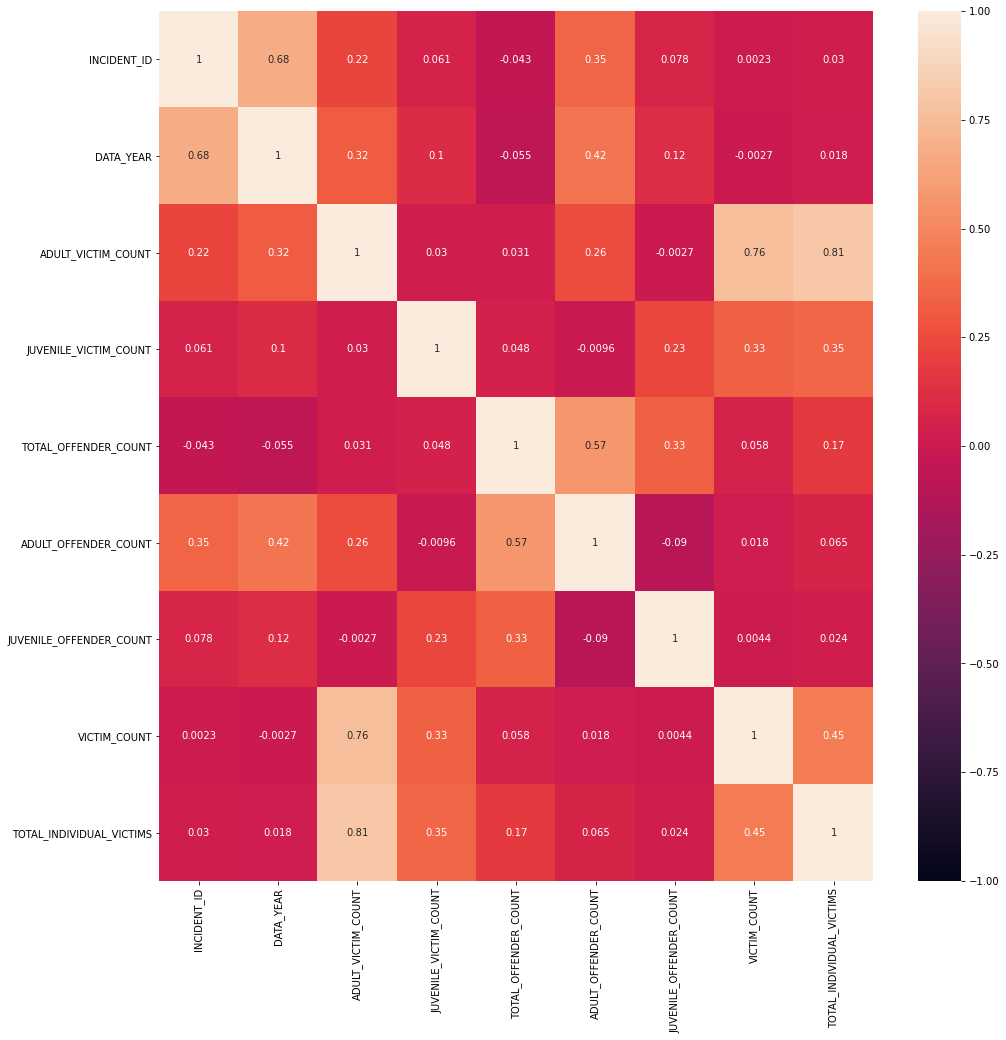

In [5]:
#heat map showing correlation
plt.figure(figsize=(16, 16))
heatmap = sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True)

Heat map that shows the correlation between variables. For example, victim count and adult victim count has a positive correlatioon oof 0.76. This means that as the number of victim count increases, the number of adult victims will increase as well. The number of adult victims given victim count will increase more that the number of juvenile victims given victim count becasue victim count and juvenile victims only have a correlation of 0.33; still a positive correlation, but not as intense as adult victims.

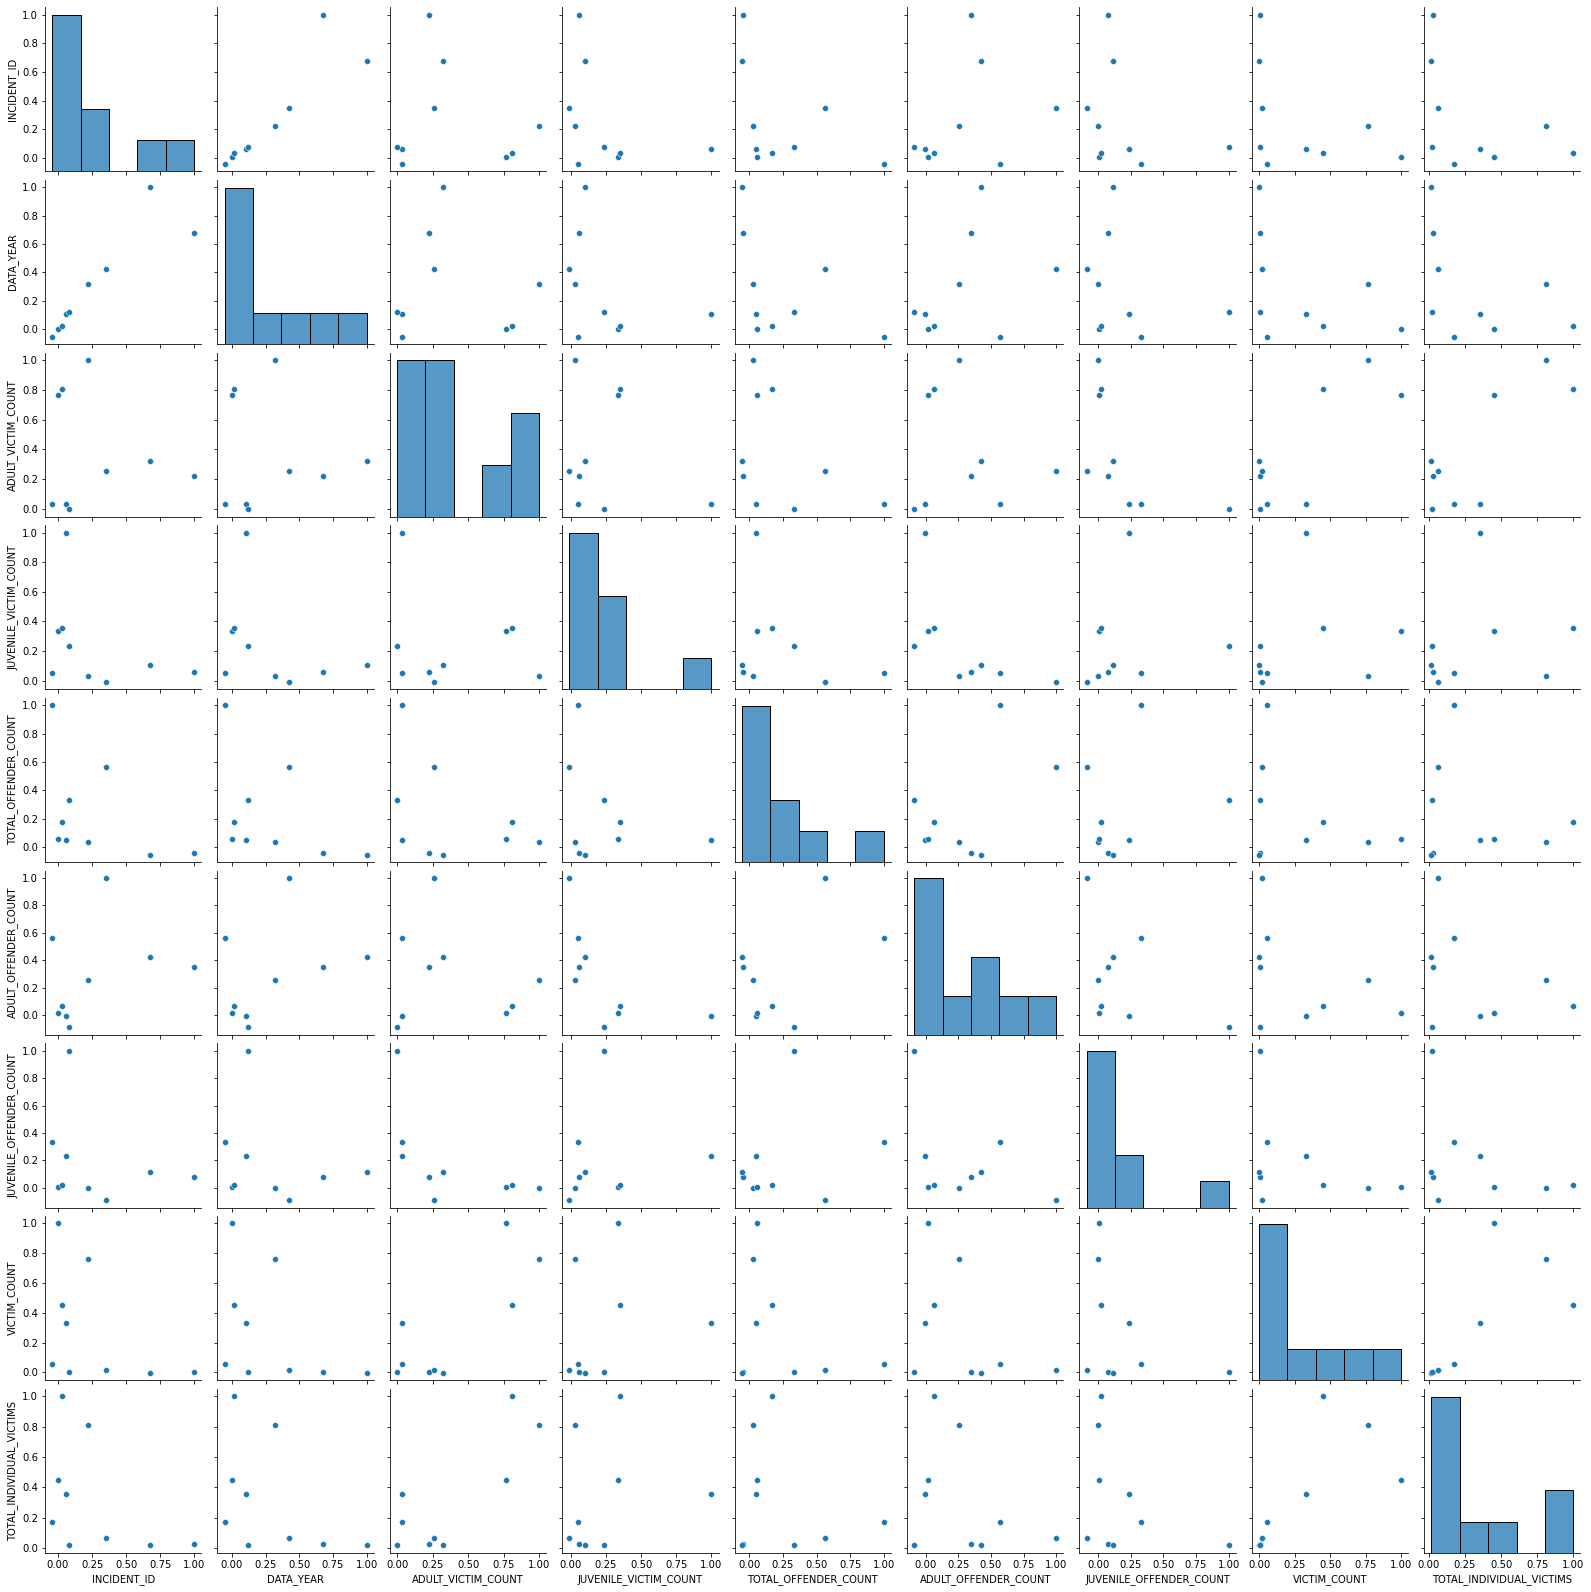

In [6]:
#Pair plot
sns.pairplot(df.corr())

Pair plot that shows the correlation between variables. Basically a visual of the heat map (instead of numbers). Viewers can easily see where there might be correlation.

### Compares victim count with the number of offenses the offender had per year

In [7]:
@ipywidgets.interact
def show_incident_by_state_yearly(x=['S', 'M'], 
                            y=['S', 'M'],
                            z=(1991, 2020, 1)):
    df_x = df[df["MULTIPLE_OFFENSE"] == x]
    incidences_per_year_x = df_x[df_x["DATA_YEAR"] < z].groupby('DATA_YEAR')['INCIDENT_ID'].count()
    df_y = df[df["MULTIPLE_OFFENSE"] == y]
    incidences_per_year_y = df_y[df_y["DATA_YEAR"] < z].groupby('DATA_YEAR')['INCIDENT_ID'].count()
    plt.xlim((1990, 2025))
    incidences_per_year_x.plot()
    incidences_per_year_y.plot()
    plt.xlabel('Year')
    plt.ylabel('Victim count by number of offenses')
    print("x = blue, y = orange")

interactive(children=(Dropdown(description='x', options=('S', 'M'), value='S'), Dropdown(description='y', opti…

From this visual, we can see that offenders with single offenses are more likely to commit a crime with a higher victim count than offenders with multiple offenses. This relationship applies from all years the data was recorded for. This is an unexpected discovering since it can be assumed that offenders with multiple offennses would commit crimes with a higher victim count; however the visual states otherwise.

### Compares victim count with offender race per year

In [8]:
@ipywidgets.interact
def show_incident_by_state_yearly(x=['White', 'Black or African American', 'Unknown', 'Multiple', 'Asian', 
                        'American Indian or Alaska Native', 'Native Hawaiian or Other Pacific Islander'], 
                            y=['White', 'Black or African American', 'Unknown', 'Multiple', 'Asian', 
                        'American Indian or Alaska Native', 'Native Hawaiian or Other Pacific Islander'],
                            z=(1991, 2020, 1)):
    df_x = df[df["OFFENDER_RACE"] == x]
    incidences_per_year_x = df_x[df_x["DATA_YEAR"] < z].groupby('DATA_YEAR')['INCIDENT_ID'].count()
    df_y = df[df["OFFENDER_RACE"] == y]
    incidences_per_year_y = df_y[df_y["DATA_YEAR"] < z].groupby('DATA_YEAR')['INCIDENT_ID'].count()
    plt.xlim((1990, 2025))
    incidences_per_year_x.plot()
    incidences_per_year_y.plot()
    plt.xlabel('Year')
    plt.ylabel('Victim count by offender race')
    print("x = blue, y = orange")

interactive(children=(Dropdown(description='x', options=('White', 'Black or African American', 'Unknown', 'Mul…

From this visual, we can compare the number of victims with an offender's race over the years the data was collected. For example, if we compare Black or African American and White, we can see that white offenders are more likely to have a higher victim count.

In [9]:
# Date range
year0 = min(df['DATA_YEAR']) #1991
yearN = max(df['DATA_YEAR']) #2020
years = list(range(year0, yearN + 1))
print('Date range: {} to {}'.format(year0, yearN))
year2idx = dict(zip(years, range(len(years))))

Date range: 1991 to 2020


### Hate Bias analysis

#### Categorize bias into three categories: races/sexiuality/religion

In [10]:
crimes_by_group = df.groupby('BIAS_DESC')['INCIDENT_ID'].count()
crimes_by_group.sort_values(ascending=False)

BIAS_DESC
Anti-Black or African American                                                                          74762
Anti-Jewish                                                                                             28013
Anti-White                                                                                              25193
Anti-Gay (Male)                                                                                         21854
Anti-Hispanic or Latino                                                                                 14030
                                                                                                        ...  
Anti-Gay (Male);Anti-Hispanic or Latino;Anti-Male                                                           1
Anti-Gay (Male);Anti-Heterosexual                                                                           1
Anti-Gay (Male);Anti-Gender Non-Conforming;Anti-Lesbian, Gay, Bisexual, or Transgender (Mixed Group)        1


In [11]:
races = crimes_by_group.loc[['Anti-Black or African American', 'Anti-Jewish', 'Anti-White', 'Anti-Hispanic or Latino',
                             'Anti-Other Race/Ethnicity/Ancestry','Anti-Asian', 'Anti-Multiple Races, Group', 
                             'Anti-American Indian or Alaska Native', 'Anti-Arab']]
sexiuality = crimes_by_group.loc[['Anti-Gay (Male)', 'Anti-Lesbian, Gay, Bisexual, or Transgender (Mixed Group)', 
                                  'Anti-Lesbian (Female)','Anti-Transgender', 'Anti-Bisexual'
                                 ]]
religion = crimes_by_group.loc[['Anti-Islamic (Muslim)', 'Anti-Other Religion', 'Anti-Catholic', 'Anti-Protestant', 
                                'Anti-Multiple Religions, Group']]

The following graph can be mainly divided into two parts, the total figure and the by_year figure.  <br> 
If the 'isTotal' field is selected as 'Total', the graph will show the total number of crimes happened in the US from 1991 to 2020, audience can change the category to view the pattern of distributions of crimes among the three categories.  <br> 
If the 'isTotal' field is selected as 'ByYear', audience can move the year ScrollableControl to change the year and see how the patterns changes throughout different years.

In [27]:
@interact(isTotal = ['Total', 'ByYear'], category = ['races', 'sexiuality', 'religions'],year=(1991, 2020, 1))
def show_incident_by_state_yearly(isTotal = 'ByYear', category = 'races',year=2005):
    crimes_by_year = df[df["DATA_YEAR"] == year]
    categories = {'races': ['Anti-Black or African American', 'Anti-Jewish', 'Anti-White', 'Anti-Hispanic or Latino',
                             'Anti-Other Race/Ethnicity/Ancestry','Anti-Asian', 'Anti-Multiple Races, Group', 
                             'Anti-American Indian or Alaska Native', 'Anti-Arab'],
                  'sexiuality': ['Anti-Gay (Male)', 'Anti-Lesbian, Gay, Bisexual, or Transgender (Mixed Group)', 
                                  'Anti-Lesbian (Female)','Anti-Transgender', 'Anti-Bisexual'] ,
                  'religions': ['Anti-Islamic (Muslim)', 'Anti-Other Religion', 'Anti-Catholic', 'Anti-Protestant', 'Anti-Multiple Religions, Group']
                 }
    bias_types = categories['races']
    # selecting rows based on racial bias    
    count_crimes_bias = [0] * len(bias_types)
    for i in range(len(bias_types)):
        bias_type = bias_types[i]
        count_crimes_bias[i] = crimes_by_year[crimes_by_year['BIAS_DESC'] == bias_type]['INCIDENT_ID'].count()
    df1 = pd.DataFrame({
    "bias_types": bias_types,
    "count_crimes_bias": count_crimes_bias
})
    fig = px.bar(
    df1,
    y="bias_types",  
    x="count_crimes_bias",
    orientation='h',  
    text="count_crimes_bias"   
)
    with fig.batch_update():
        if isTotal == 'Total':
            crimes_by_year = df
        else:
            crimes_by_year = df[df["DATA_YEAR"] == year]
        bias_types = categories[category]
        count_crimes_bias = [0] * len(bias_types)
        for i in range(len(bias_types)):
            bias_type = bias_types[i]
            count_crimes_bias[i] = crimes_by_year[crimes_by_year['BIAS_DESC'] == bias_type]['INCIDENT_ID'].count()
        df1 = pd.DataFrame({
        "bias_types": bias_types,
        "count_crimes_bias": count_crimes_bias
        })
        fig = px.bar(
            df1,
            y="bias_types",  
            x="count_crimes_bias",
            orientation='h',  
            text="count_crimes_bias",
            color="count_crimes_bias"
        )
        fig.show()

interactive(children=(Dropdown(description='isTotal', index=1, options=('Total', 'ByYear'), value='ByYear'), D…

Clearly, racial prejudice is the leading cause of prejudice in the United States, with over 150,000 racially biased offenders occurring in total. And of the types of racial prejudice, anti-black or African-American is definitely the most serious discrimination. While this improved at the turn of the century, the number of anti-Black or African-American crimes increased from 2,181 to 3,521 between 2019 and 2020, almost double the increase. Anti-white and anti-Semitic are the second and third largest categories, with the number of anti-white largely increasing from 2019 to 2020, which is also indicative of the tensions between blacks and whites over the past two years.<br> 
The total number of crimes committed as a result of anti-sexual behaviour is around 30,000. Of these, anti-gay (male) crimes account for 22k. The distribution has not changed significantly over the years, except that the number of anti-trans crimes has steadily increased every year since they were identified in 2013, and even reached 224 in 2020. I believe that some attention should be paid to the transgender community. The safety of the homosexual community is always a big issue.<br> 
Anti-religious crime is also a serious problem in this country, with a total of around 110,000+. The distribution of these five groups has changed considerably over the years. Overall, anti-Islam (Muslim) and anti-other religions are the two most important factors.<br> 

### Compare the trends of states

#### Calculate and store yearly data for each state into a new dataframe

In [13]:
states = ['AR', 'AZ', 'CA', 'CO', 'CT', 'DC', 'DE', 'GA', 'IA', 'ID', 'IL',
   'KS', 'MA', 'MD', 'MN', 'MO', 'MS', 'NJ', 'NV', 'NY', 'OH', 'OK',
   'OR', 'PA', 'TN', 'TX', 'VA', 'WA', 'WI', 'AL', 'FL', 'IN', 'KY',
   'LA', 'ME', 'MI', 'NC', 'ND', 'RI', 'SC', 'UT', 'WY', 'AK', 'MT',
   'NM', 'SD', 'VT', 'NH', 'NB', 'WV', 'GM', 'FS', 'HI']
incidences_per_year_state = {}
years = [i for i in range(1991, 2021)]
n = 30 #2021-1991
for state in states:
    incidences = [0] * n
    df_state = df[df["STATE_ABBR"] == state]
    for i in range(n):
        incidences[i] = df_state[df_state['DATA_YEAR'] == years[i]]['INCIDENT_ID'].count() 
    incidences_per_year_state[state] = incidences

The following graph enable audience to choose states and compare the yearly trends of the chosen states. When the mouse is moved over the fold, audience can also see the specific number of crimes for each year. Auidence can also select all to show the trends for all states. But that would lead to lots of overlaps. 

In [14]:
data_plot = {}

@interact
def show_incident_by_state_yearly(show=['by_state', 'all'], state=['AR', 'AZ', 'CA', 'CO', 'CT', 'DC', 'DE', 'GA', 'IA', 'ID', 'IL',
       'KS', 'MA', 'MD', 'MN', 'MO', 'MS', 'NJ', 'NV', 'NY', 'OH', 'OK',
       'OR', 'PA', 'TN', 'TX', 'VA', 'WA', 'WI', 'AL', 'FL', 'IN', 'KY',
       'LA', 'ME', 'MI', 'NC', 'ND', 'RI', 'SC', 'UT', 'WY', 'AK', 'MT',
       'NM', 'SD', 'VT', 'NH', 'NB', 'WV', 'GM', 'FS', 'HI']):
    if show == 'by_state':
        data_plot[state] = incidences_per_year_state[state]
        df_plot = pd.DataFrame(data=data_plot)
        fig = go.Figure()
        for column in df_plot:
            fig.add_trace(go.Scatter(x=years, y=df_plot[column], 
                            mode='lines+markers',
                            name=column))
        fig.show()
    else:
        fig = go.Figure()
        for state in ['AR', 'AZ', 'CA', 'CO', 'CT', 'DC', 'DE', 'GA', 'IA', 'ID', 'IL',
       'KS', 'MA', 'MD', 'MN', 'MO', 'MS', 'NJ', 'NV', 'NY', 'OH', 'OK',
       'OR', 'PA', 'TN', 'TX', 'VA', 'WA', 'WI', 'AL', 'FL', 'IN', 'KY',
       'LA', 'ME', 'MI', 'NC', 'ND', 'RI', 'SC', 'UT', 'WY', 'AK', 'MT',
       'NM', 'SD', 'VT', 'NH', 'NB', 'WV', 'GM', 'FS', 'HI']: 
            data_plot[state] = incidences_per_year_state[state]
            df_plot = pd.DataFrame(data=data_plot)
            
            for column in df_plot:
                fig.add_trace(go.Scatter(x=years, y=df_plot[column], 
                            mode='lines+markers',
                            name=column))
        fig.show()

interactive(children=(Dropdown(description='show', options=('by_state', 'all'), value='by_state'), Dropdown(de…

We can see that California has had the most bias crimes in almost all periods. This number peaked in 2001 and has gradually decreased since then. Another notable state is New Jersey, which has seen a dramatic increase in the number of crimes and became the most biased state in 2020.

### Heat map (of the US)

Grouping all the Bias Description and counting the occurences of each:

(Only the top 50 Biases were included)

In [15]:
top=pd.Series(df.groupby('BIAS_DESC')['BIAS_DESC'].count()).nlargest(50)
top=top.to_frame()

Fixing the columns:

In [16]:
top['Bias']=top.index
top=top.reset_index(drop='True')
top.rename(columns={'BIAS_DESC':'Count'},inplace='True')

In [17]:
val=[1, 2, 4, 5, 6, 8, 9, 10, 11, 12, 13, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 44, 45, 46, 47, 48, 49, 50, 51, 53, 54, 55,56,60,66]

In [18]:
@ipywidgets.interact(Bias=widgets.Combobox(options=top['Bias'].tolist(),value="Anti-Black or African American")
                     ,Style=ipywidgets.RadioButtons(options=["plasma","magma","viridus","inferno"])
                     ,Fill=ipywidgets.ColorPicker(value="green")
                     ,Single_offense=True
                     ,Multiple_offense=True)
def print_map(Bias,Single_offense,Multiple_offense,Style,Fill):

    var=pd.Series([])
    off='None'
    if Single_offense==True and Multiple_offense==False:
        var=df.loc[(df.BIAS_DESC==Bias) & (df.MULTIPLE_OFFENSE=='S')].groupby('STATE_NAME')['STATE_NAME'].count()
        off='Single Offense'
    elif Single_offense==False and Multiple_offense==True:
        var=df.loc[(df.BIAS_DESC==Bias) & (df.MULTIPLE_OFFENSE=='M')].groupby('STATE_NAME')['STATE_NAME'].count()
        off='Multiple Offense'
    elif Single_offense==True and Multiple_offense==True:
        var=df.loc[df.BIAS_DESC==Bias].groupby('STATE_NAME')['STATE_NAME'].count()
        off='Single and Multiple Offense'
    var.tolist()
    inc_count = dict(zip(val, var))
        
    proj = bqplot.AlbersUSA()

    color_sc = bqplot.ColorScale(scheme = Style)
    color_ax = bqplot.ColorAxis(scale = color_sc, label = 'Incident Count')
    
    label1 = ipywidgets.Label()
    label2 = ipywidgets.Label()
        
    def hover_over_state(mark, event):
        label1.value = "%s: " % (event['data']['name'])
        label2.value = "%s cases" % (event['data']['color']) if 'color' in event['data'] else "No Data"
        
    mark = bqplot.Map(
    map_data = bqplot.topo_load("map_data/USStatesMap.json"),
    color = inc_count,
    colors = {'default_color': 'none'},
    scales = {'projection': proj, 'color': color_sc}
    )
        
    mark.on_hover(hover_over_state)
    mark.hovered_styles={'hovered_fill':Fill,'hovered_stroke':'white','hovered_stroke_width':5.0}
    
    fig = bqplot.Figure(marks = [mark], axes =[color_ax],title='Bias Heatmap ({0}) ({1})'.format(Bias,off))
    display(ipywidgets.VBox([(ipywidgets.HBox([label1, label2])), fig]))

interactive(children=(Combobox(value='Anti-Black or African American', description='Bias', options=('Anti-Blac…

This is a heat map of the US comparing the biases across multiple states. The Biases can be selected from a combo box, the color scheme can be selected using radio buttons and the color of the fill during mouse over can be selected using a colorpicker.

In [19]:
@ipywidgets.interact(Year=IntSlider(description='Year:',min=df.DATA_YEAR.min()
                                    ,max=df.DATA_YEAR.max(),step=1,layout=Layout(width='100%'))
                     ,Style=ipywidgets.RadioButtons(options=["plasma","magma","viridus","inferno"])
                     ,Fill=ipywidgets.ColorPicker(value="green")
                     ,Single_offense=True
                     ,Multiple_offense=True)
def print_year(Year,Single_offense,Multiple_offense,Style,Fill):

    vc=pd.Series([])
    off='None'
    if Single_offense==True and Multiple_offense==False:
        vc=df.loc[(df.DATA_YEAR==Year) & (df.MULTIPLE_OFFENSE=='S')].groupby('STATE_NAME')['VICTIM_COUNT'].sum()
        off='Single Offense'
    elif Single_offense==False and Multiple_offense==True:
        vc=df.loc[(df.DATA_YEAR==Year) & (df.MULTIPLE_OFFENSE=='M')].groupby('STATE_NAME')['VICTIM_COUNT'].sum()
        off='Multiple Offense'
    elif Single_offense==True and Multiple_offense==True:
        vc=df.loc[(df.DATA_YEAR==Year)].groupby('STATE_NAME')['VICTIM_COUNT'].sum()
        off='Single and Multiple Offense'
    vc.tolist()
    vic_count = dict(zip(val, vc))
        
    proj = bqplot.AlbersUSA()

    color_sc = bqplot.ColorScale(scheme = Style)
    color_ax = bqplot.ColorAxis(scale = color_sc, label = 'Victim Count')
    
    label1 = ipywidgets.Label()
    label2 = ipywidgets.Label()
        
    def hover_over_state(mark, event):
        label1.value = "%s: " % (event['data']['name'])
        label2.value = "%s victims" % (event['data']['color']) if 'color' in event['data'] else "No Data"
        
    mark = bqplot.Map(
    map_data = bqplot.topo_load("map_data/USStatesMap.json"),
    color = vic_count,
    colors = {'default_color': 'none'},
    scales = {'projection': proj, 'color': color_sc}
    )
        
    mark.on_hover(hover_over_state)
    mark.hovered_styles={'hovered_fill':Fill,'hovered_stroke':'white','hovered_stroke_width':5.0}
    
    fig = bqplot.Figure(marks = [mark], axes =[color_ax],title='Victim Count Heatmap for the year ({0}) ({1})'.format(Year,off))
    display(ipywidgets.VBox([(ipywidgets.HBox([label1, label2])), fig]))
    



interactive(children=(IntSlider(value=1991, description='Year:', layout=Layout(width='100%'), max=2020, min=19…

This is a heat map of the US showing the victim count for 2019. The Year can be selected using a slider, the color scheme can be selected using radio buttons and the color of the fill during mouse over can be selected using a colorpicker.

## Pie chart Data Visualization
In the phase 2 of the data visualization project, I made a pie chart with the help of vegalite. It was pretty basic but I wanted to do something in a pie chart. That's why I made use of the plotly package to increase more interactivity. Here, I have created a pie chart depicting the number of crimes in a specific division. In this, if we select a specific division in the label index, then the division gets selected/deselected accordingly in the pie chart. The perecentage also changes accordingly in the pie chart giving us more information of the number if crimes happening. It is also interactive in a way that if we hover over it, it gives us the number and the percentage of the crimes.

In [20]:
labels = df['DIVISION_NAME'].unique()
values=[]
for each in labels:
    values.append(len(df[df['DIVISION_NAME']==each]))

fig = go.Figure(data=[go.Pie(labels=labels, values=values, hole=0.1)])
fig.show()

# Vegalite visualizations

## Interactive Bar graphs
In this vegalite visualization, I have constructed two bar graphs connected through the selection. Here on the first graph, it shows the number of crimes happening in a particular state. If we select a state, or more than one state, it changes the bar graph showing the number of crimes in the type of location below accordingly. This visualization is helpful as it shows the different number of crimes happening in a different location in a particular state.
The github repository for the visualization: https://github.com/SnehaBaranwal/snehab2412.github.io/tree/master/Phase3DV/AreaChart

In [21]:
%%html
<iframe src="https://snehabaranwal.github.io/snehab2412.github.io/Phase3DV/InteractiveBarCharts/", width=1000, height=500></iframe>

## Area Graph visualization
Here in this area graph, it shows the total offenders over the years in different regions depicted by different colour. It is interesting to see that we have one colour from the label missing, that means we have zero offenders in the U.S. Territories. The highest number of offenders is in the Midwest which have only increased recently. Infact, the nummber of offenders have increased for all the other regions. We also have interactivity on mouseover showing the year, total offenders in the year and the region name.
The github repository for this visualization is https://github.com/SnehaBaranwal/snehab2412.github.io/tree/master/Phase3DV/InteractiveBarCharts

In [22]:
%%html
<iframe src="https://snehabaranwal.github.io/snehab2412.github.io/Phase3DV/AreaChart/", width=1000, height=500></iframe>

# Area Chart showing the Total Number of Hate Crimes over the Years

This area chart visualization shows the total hate crimes that occurred in the USA over the years. It is an interactive visualization with rectangular brush and gradient. Selecting any particular area highlights the selected area and fades the rest of the area. The gradient moves from black to red over the years.

In [23]:
%%html
<iframe src="https://kothariashish21.github.io/ashishk21-DataViz.github.io/Phase3DV/AreaChart/", width=1000, height=500></iframe>

# Scatter Plot showing the Number of Victims Vs Total Offender 

This scatter plot visualization shows the relationship between numbers of victims and total offender in each population group. The population data in the data set was organized in groups over the years so plotting a scatter plot best depicted the relationship between the two and the groups. The visualization is interactive so by zooming in and zooming out we can see all the plotted data points. The axis values also change as per the plotted points as we zoom in and out. Here the groups mean the following:

(1) 0   -  Possessions (Puerto Rico, Guam, Canal Zone, Virgin Islands, and American Samoa)
(2) 1A  - Cities 1,000,000 or over
(3) 1B  - Cities from 500,000 thru 999,999
(4) 1C  - Cities from 250,000 thru 499,999
(5) 2   - Cities from 100,000 thru 249,999
(6) 3   - Cities from 50,000 thru 99,999
(7) 4   - Cities from 25,000 thru 49,999
(8) 5   - Cities from 10,000 thru 24,999
(9) 6   - Cities from 2,500 thru 9,999
(10) 7  - Cities under 2,500
(11) 8A - Non-MSA counties 100,000 or over
(12) 8B - Non-MSA counties from 25,000 thru 99,999
(13) 8C - Non-MSA counties from 10,000 thru 24,999
(14) 8D - Non-MSA counties under 10,000
(15) 8E - Non-MSA State Police
(16) 9A - MSA counties 100,000 or over
(17) 9B - MSA counties from 25,000 thru 99,999
(18) 9C - MSA counties from 10,000 thru 24,999
(19) 9D - MSA counties under 10,000
(20) 9E - MSA State Police


Note - As the data set is huge the Vega lite editor crashed all the time while working on the visualization and displaying the output. We have also included the GitHub repository link in case the Vega lite crashes again.

Github : https://github.com/kothariashish21/ashishk21-DataViz.github.io/tree/master/Phase3DV

In [24]:
%%html
<iframe src="https://kothariashish21.github.io/ashishk21-DataViz.github.io/Phase3DV/Scatterplot/", width=1000, height=500></iframe>

# Repeated Bar Charts 

In order to gain further insights into the data we decided to plot a repeated bar graphs to show the following relationship between the bias description and other attributes. As it is hate crime data set we decided to keep the bias description as the offset across all the graphs to gain more insight as to which ethnicity, race or community was targeted more. From the graph we can clearly see that the Hate Crime was highest for Anti-Black or African American across all the graphs. As the graph is interactive, hovering over the bar gives all the information for that graph and selecting the bar fades all the other bars in the visualization. Also, we can see from the visualization that there are too many attributes so the legend cannot display everything.

In [25]:
%%html
<iframe src="https://kothariashish21.github.io/ashishk21-DataViz.github.io/Phase3DV/RepeatedBarCharts/", width=1000, height=700></iframe>